Project in one_hot_encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_modeling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df=df.drop(["RowNumber", "CustomerId", "Surname"],axis=1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Creat dummy variables

geography=pd.get_dummies(df["Geography"],drop_first=True)

In [9]:
gender=pd.get_dummies(df["Gender"],drop_first=True)

In [10]:
# Concatenate the data frames

df=pd.concat([df,geography,gender],axis=1)

In [11]:
# Drop unnecessary columns

df=df.drop(["Geography","Gender"],axis=1)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
df.shape

(10000, 12)

In [14]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [15]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
# Dividing Dependent and Independent variable

X = df.drop("Exited",axis=1)

y=df["Exited"]

In [17]:
# Sampling

from imblearn.over_sampling import SMOTE
from collections import Counter

sampler = SMOTE()
X,y = sampler.fit_resample(X,y)

print("SMOTE {}".format(Counter(y)))

SMOTE Counter({1: 7963, 0: 7963})


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [22]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [ ]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2036
           1       0.77      0.79      0.78      1946

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



Text(33.0, 0.5, 'Actual Label')

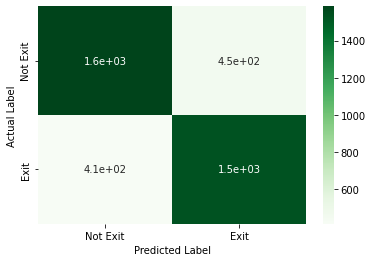

In [26]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [27]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2036
           1       0.77      0.81      0.79      1946

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.79      0.79      0.79      3982



Text(33.0, 0.5, 'Actual Label')

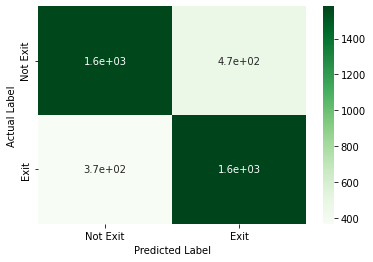

In [29]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [30]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2036
           1       0.80      0.81      0.80      1946

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



Text(33.0, 0.5, 'Actual Label')

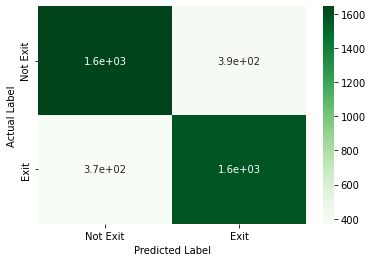

In [32]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [33]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2036
           1       0.85      0.86      0.85      1946

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



In [35]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1730,  306],
       [ 277, 1669]], dtype=int64)

Text(33.0, 0.5, 'Actual Label')

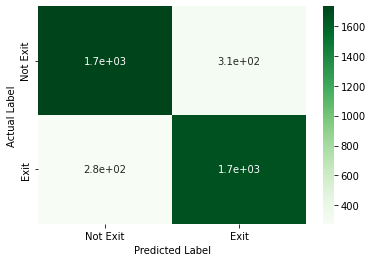

In [36]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')